In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math

In [ ]:
def relu(x):
    # input is numpy
    y1 = np.multiply([0.01],x)
    return np.maximum(x,y1)
    #return np.maximum(x,0)

vfunc = np.vectorize(lambda x : 1 if x > 0 else 0.01,  otypes=[np.float])  ## vectorizing allows us to apply arbitrary function to all the element of a numpy vector
def relu_derivative(x):
    # input is numpy vector
    return vfunc(x)
    #return (x > 0).astype(int)  # this replaces all the positive value by 1 and rest by 0

def sigmoid(x):
    # input is numpy vector
    return 1.0/(1.0+np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1-sigmoid(x))

def mean_square_derivative(output_activations, y):
    return (output_activations-y)

# following function will be used to transfor the training lables for digits recognition
def vectorized_result(j): 
    # Returns 10-size column with 1 at jth position and rest are 0
    e = np.zeros((10, 1))
    e[j] = 1.0
    return e
#print(relu_derivative(relu([[1],[2.1],[-2]])))

**Network 1**

In [ ]:
class Network:
    def __init__(self, sizes, activation_func = sigmoid, activation_derivative = sigmoid_derivative,reg_constant=0):
        """
        Objective: Intialize the network
        Input:sizes - tuple representing number of neurons in each layer from left to right
              Note: sizes[0] is the number of inputs: they are not neurons per se
              E.g., sizes = (5,4,2) means that there are 5 inputs, 4 neurons in the first hidden layer, and 2 neurons
              in the ouput layer.
        """
        self.train_cost_history= []    ## Can be used to store costs w.r.t training data w.r.t iteration number
        self.test_cost_history = []    ## Can be used to store costs w.r.t testing data w.r.t iteration number
        self.sizes = sizes
        self.activation_func = activation_func
        self.activation_derivative = activation_derivative
        self.cost_derivative = mean_square_derivative

        self.num_layers = len(sizes)   ### Number of layers is length of list sizes
        
        self.biases = [np.random.randn(number_of_neurons,1) for number_of_neurons in sizes[1:]]
        
        self.weights = [np.random.randn(y,x) for (x,y) in zip(sizes[:-1],sizes[1:]) ]
        #sizes[:-1] is just sizes, and sizes[1:] is every layer that isn't the input, so zip([s0,s1..sn],[s1,...sn])
        #so we get weights as metrices of sizes s1xs0, s2xs1... snxsn-1(where matrix sixsi-1 corresponds to the transition)
        #from the i-1th layer to the ith.


        self.reg_constant=reg_constant #for problem 3
    
    
    def feedforward_full(self,x):   #maybe don't need to define this as a function(can write directly in backprop??)
        #input x;
        f=x
        inputs_per_node = [] #for convenience, we say layer 1 has no input(no incoming edges).
        outputs_per_node = [f]#first layer's output is just the input, since the layer does nothing
        for b, w in zip(self.biases, self.weights):
            p = np.dot(w,f)+b
            inputs_per_node.append(p) #input_per_node[i] gives the value going into the nodes in layer i+1
            f = self.activation_func(p)
            outputs_per_node.append(f)#output_per_node[i] gives the vale going out of the nodes in  layer i+1
        return inputs_per_node,outputs_per_node #inputs,outputs of each layer. In particular, output_per_node[-1] give the 
    #output of the network
    def cost_derivative(self, lm,ao):
      return(lm-ao) #here, lm,ao are numpy arrays
    def feedforward(self,x):
      #return (self.feedforward_full(x)[-1][-1]) #feed_forward_full[-1] gives output_per node 
      for b,w in zip(self.biases, self.weights):
        x = self.activation_func(np.dot(w, x)+b)
      return x    
    def SGD(self, training_data, epochs, mini_batch_size, learning_rate, test_data=None):
        """
        Objective: Stochastic Gradient Descent
        1. tranining_data is a python list of tuples of the form (x, y) 
        where x is the input vector (numpy matrix of size (n x 1)) and y is the output label
        2. epochs is the number of epochs
        3. mini_batch_size is the size of single mini-batch on which we will perform the backpropogation
        4. learning_rate is learning rate!
        5. test_data is optional in the same format as training data: can be used to calculate accuracy on each
        iteration. (Ignore test_data while implementing for first time)
        """
        #print("start sgd")
        if(self.num_layers ==1 or self.num_layers ==0):#takes care of cases where SGD isn't possible. In the case where
            #sizes has length 1, the network just takes the input and does nothing. So that's pointless.
            print("Bad Network")
            return None#not sure what to put here. Or what to return :/
        #print("Not bad Network")
        num_batches = len(training_data)/mini_batch_size
        #print("mini batch size is", mini_batch_size)
        #TODO: Create batches, and call apply_backprop_on_batch on each batch
        #creating batches
        #print("init biases\n",self.biases)
        set_of_average_costs = []
        set_of_average_costs1 = []
        #print(test_data)


        #vectorizing the test_data ..which is currently of the form [([[1],[2]..],7)]
        vectorized_test_data = []
        for p,q in test_data:
          i=0
          for i in range(10):
            if q==i:
              q=vectorized_result(i)
              break
          vectorized_test_data.append((p,q))  #note this part is only used for calculating the cost of test data per epoch


        for it in range(epochs):
          #print("epoch")
          #print("loop1")
          #t = np.random.shuffle(training_data) # had error t= np.random.shuffle(training_data) returns None...
          t = training_data
          #print(type(t))
          np.random.shuffle(training_data) #workaround. If this works, we might as well just say suffle(training data) and
          #replace alll occurences of t with our shuffled training data
          #print(t)
          #print("dafsdf",t)
          #j=0
          i=0
          set_of_batches = []
          while(i<num_batches):
            mini_batch_in_creation = []
            j=0
            while(j<mini_batch_size and (i*mini_batch_size+j)<len(training_data)):
              #print("fadfdsfafdsfdsfdafdsafdsfdsfdsfdsfdsafdsfdsfdsf",mini_batch_in_creation)
              mini_batch_in_creation = mini_batch_in_creation+[t[i*mini_batch_size+j]]
              j=j+1
            set_of_batches = set_of_batches+ [mini_batch_in_creation]
            i=i+1        
            #set_of_batches stores each set of mini batches
          for batch in set_of_batches:
              self.apply_backprop_on_batch(batch,learning_rate)
              #this updates the weights and biases of the network
          #average_cost_after_epoch =
          #from this onwards... is for question 2(storing train & test costs per epoch)
          sum_square_weights=0
          for i in self.weights:
            j = np.square(i)
            sum_square_weights = sum_square_weights + np.sum(j)           #############################################sum of square of the weights  for regularization
          average_training_cost_for_epoch=0
          for x,y in training_data:
            total_output = self.feedforward(x)
            mse_on_node = [[(p-q)*(p-q)/2 for p,q in zip(r,s)] for r,s in zip(total_output,y)]
            i=0
            for s in mse_on_node:
              i=i+s[0]
            #the above sum stores the mean square part of the cost function. Below, we add reg_constant*sum_square_weights for regularization(question 3):
            i=i+(((self.reg_constant)*sum_square_weights)/(2*len(training_data)))  #from the + is reg term
            i = i/(len(total_output)) #so for anything in training data, cost is now the usual cost +lambda/(length of output) * sum of sqaure of weights/len(training_data)..
            #i.e this is regularized (...? we do not really need the len(total_output) part as its a constant for a network) 
            average_training_cost_for_epoch = average_training_cost_for_epoch + i
          average_training_cost_for_epoch = average_training_cost_for_epoch/len(training_data)#averaging costs
          set_of_average_costs = set_of_average_costs +[average_training_cost_for_epoch]
          
          average_test_cost_for_epoch=0
          for x,y in vectorized_test_data:
            #print(y)
            total_output1 = self.feedforward(x)
            mse_on_node1 = [[(p-q)*(p-q)/2 for p,q in zip(r,s)] for r,s in zip(total_output1,y)]
            i=0
            for s in mse_on_node1:
              i=i+s[0]
            #the above sum stores the mean square part of the cost function.Below, we add reg_constant*sum_square_weights for regularization(for question 3):
            i=i+(((self.reg_constant)*sum_square_weights)/(2*len(vectorized_test_data)))#..................
            i = i/(len(total_output1))#...............................................................................................
            #.........................................................................
            average_test_cost_for_epoch = average_test_cost_for_epoch + i
          average_test_cost_for_epoch = average_test_cost_for_epoch/len(vectorized_test_data)
          set_of_average_costs1 = set_of_average_costs1 +[average_test_cost_for_epoch]
        
        #print("Set of average training costs: ",set_of_average_costs)
        #print("Set of average test costs: ",set_of_average_costs1)            
        self.train_cost_history = set_of_average_costs
        self.test_cost_history = set_of_average_costs1        
        print("End of SGD")                
            ####
        
        #pass
    
    def apply_backprop_on_batch(self, batch, learning_rate):
        """
        Applies the backprop on the given batch and updates weights and biases
        
        """
        #print("\n new batch")
        #print("\n", batch)
        #gradient_biases = [np.zeros(b.shape) for b in self.biases]
        #gradient_weights = [np.zeros(w.shape) for w in self.weights]
        #print(self.sizes)
        #batch_size = len(batch)
        sum_of_gradient_biases = [np.zeros(x.shape) for x in self.biases]
        sum_of_gradient_weights = [np.zeros(y.shape) for y in self.weights]
        #sum_of_gradient_biases = 
        for x,y in batch:
            # x, y is one training example
            gradient_biases_on_example, gradient_weights_on_example = self.apply_backprop_on_example(x,y)
            #print("\nbazangons\n",gradient_biases_on_example,"\nbazinga\n",gradient_weights_on_example,"\nbazongo")
            #print(gradient_biases_on_example,"\n\n\n")
            sum_of_gradient_biases = [a+b for a,b in zip(sum_of_gradient_biases,gradient_biases_on_example) ]
            #print(sum_of_gradient_biases)
            sum_of_gradient_weights = [a+b for a,b in zip(sum_of_gradient_weights, gradient_weights_on_example)]
        #note we can get rid of the "x in" part and get the same thing, but as arr([....])...?!
        #now we update biases'
        #print(sum_of_gradient_weights)
        self.biases = [(bias-((learning_rate/len(batch))*sigma_bias_gradients)) for bias,sigma_bias_gradients in zip(self.biases,sum_of_gradient_biases)]
        #print("adfssssssssss\n\n\n",self.biases)
        #now we update weights
        self.weights = [(weight-(((learning_rate/len(batch))*sigma_weight_gradients))) for weight,sigma_weight_gradients in zip(self.weights,sum_of_gradient_weights)]
        #have not tested the above two syntax wise..thought similar as the others(if error,check these as well) 
        #print("bias afte batch\n",self.biases)
        #we have now updated the biases and weights of the network
        
            # TODO
        #pass
        
    def apply_backprop_on_example(self, x, y ):
        """
        Applies backpropagation and calculates partial derivates for all the weights and biases
        for one given example (x,y)
        NOTE: It does NOT updates weights/biases. That is done by the caller function
        """
        #print("weights before example", self.weights)
        #print("\n Biases before example", self.biases)
        input_per_node,output_per_node = self.feedforward_full(x)
        #print("adfadffd\n",input_per_node)

        biases_gradients = [np.zeros(b.shape) for b in self.biases]
        weights_gradients = [np.zeros(w.shape) for w in self.weights]
                
        #now we find the "error" per node.        
        #final_output = output_per_node[-1]
        error_per_node = self.cost_derivative(output_per_node[-1],y)#*(self.activation_derivative(input_per_node[-1]))
        #print("error_per_node(-1).......\n",error_per_node)
        #this is the "error" in the final layer..kinda
        #print(error_per_node)
        #print(error_per_node[-1])
        #note: error in layer 1 doesn't make sense. Either put 0 for each node there, or just leave it
        #also, in SGD we have put the condition that the number of layers is at least two.
        biases_gradients[-1] = error_per_node
        #weights_gradients[-1] = np.dot(error_per_node,output_per_node[-2].transpose()) #this is for the non regularized version
        weights_gradients[-1] = np.add(np.dot(error_per_node,output_per_node[-2].transpose()),((self.weights[-1]*self.reg_constant)/len(training_data)))#regularized version.......................

        for i in range(2,self.num_layers):#this is where we actually propogate backwards along the layers
          p = input_per_node[-i]
          ww = self.activation_derivative(p)
          error_per_node = np.dot(self.weights[-i+1].transpose(),error_per_node)*ww
          biases_gradients[-i] = error_per_node
          #weights_gradients[-i] = np.dot(error_per_node,output_per_node[-i-1].transpose())#for the non regularized version
          weights_gradients[-i] = np.add(np.dot(error_per_node,output_per_node[-i-1].transpose()),(self.weights[-i]*((self.reg_constant)/len(training_data))))#regularized version.................

        return biases_gradients, weights_gradients
    
    def test_accuracy(self, test_data):
      i=0
      #print(type(test_data[0][1]))
      if type(test_data[0][1])==np.uint8:# or type(test_data[0][1])==np.int64:   #we are presented with test data where inputs are vectorized, but desired outputs are given as integers form 0 to 9
        j=0                                                                    #uint8 is the type of test data for digit, while int64 is that of shapes
        p=len(test_data)
        for ii in range (p):
          #plt.imshow(x_test[i],  cmap='gray')
          #print("Label is:", y_test[i])
          #print("Network's Prediction:", np.argmax(net.feedforward(x_test_vectorized[i])))
          if (test_data[ii][1] == np.argmax(net.feedforward(test_data[ii][0]))):
            j=j+1
        return(j/p)        
      else: #here, both input and desired outputs are given in vectorized form  .....type numpy.ndarray (maybe add else condition for wrong types of test_data given?)
        for t in test_data:
          s = self.feedforward(t[0])
          if np.argmax(s) == np.argmax(t[1]):
            i=i+1
            #print("\n afsdgdsfsfdgfhgd",i)
          #print(i,"/",len(test_data))  
        return(i/len(test_data)) 
        #pass
        
        
            

**Digit recognition using Network**
We import the data from mnist.

In [ ]:
import keras
from keras.datasets import mnist  # NOTE: keras is only used to import data

(x_train, y_train), (x_test, y_test) = mnist.load_data()
y_train_vectorized = list(map(vectorized_result, y_train))   # This will convert digit 0 to [1.0,0,0,0..0], 1 to [0,1.0,0,0...0] and so on...
x_train_vectorized = list(map(lambda x: np.reshape(x, (784,1))/255, x_train)) 
#print(y_train_vectorized[0])

training_data = list(zip(x_train_vectorized, y_train_vectorized))
#print(training_data[0])

x_test_vectorized = list(map(lambda x: np.reshape(x, (784,1))/255, x_test)) 
test_data = list(zip(x_test_vectorized, y_test))   # Notice carefully that we have not vectorized the y_test
#print(y_test)
#print(test_data)
#print(type(training_data[0][1]))

Training

In [ ]:
#net = Network([784, 16, 10],activation_func = relu, activation_derivative = relu_derivative)
#net.SGD(training_data[:1000], 30, 10, 0.01, test_data=test_data)   # using training_data[:20000] just to make epochs faster. Consider using full training data
#when using 0.1 relu invalid value encountered????
net = Network([784, 16, 10],reg_constant=0.01)#,activation_func = relu, activation_derivative = relu_derivative) #..................added regularization constant
net.SGD(training_data[:5000], 30, 50, 0.1, test_data=test_data)   # using training_data[:20000] just to make epochs faster. Consider using full training data
#print(net.test_accuracy(training_data[:1000]))
#net.test_accuracy(test_data) 
#there are two print things commented in sgd that can be used to print the set of average costs of training, test data 

End of SGD


In [ ]:
#--NotebookApp.iopub_data_rate_limit=1e10

In [ ]:
  j=0
  p=1000
  for i in range (p):
    #plt.imshow(x_test[i],  cmap='gray')
    #print("Label is:", y_test[i])
    #print("Network's Prediction:", np.argmax(net.feedforward(x_test_vectorized[i])))
    if (y_test[i] == np.argmax(net.feedforward(x_test_vectorized[i]))):
       j=j+1
  print(j/p)

0.783


**Graph**
    :The code prints three waves on a graph.

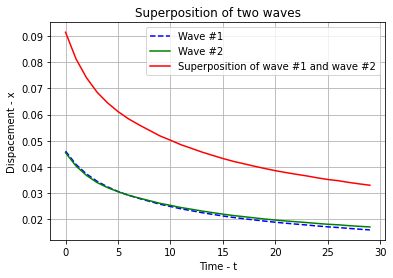

In [ ]:

n1 = 10
n2 = 20
amp = 4
#time = [i/1000.0 for i in range (0,1000)] # for one second
time = [i for i in range (30)] #number of epochs 
# let angular velocity be 1 radian per second
#wave1 = [amp*math.sin(n1*t)  for t in time]
wave1 = [error for error in net.train_cost_history]
wave2 = [error for error in net.test_cost_history]
####superposition of two waves is obtained by adding their values at each instance of time
superposition = [wave1[i] + wave2[i] for i in range(len(time))]
plt.plot(time, wave1, 'b--', label = "Wave #1")
plt.plot(time,wave2, 'g',  label = "Wave #2")
plt.plot(time, superposition, 'r-',  label = "Superposition of wave #1 and wave #2")
plt.legend()
plt.xlabel("Time - t")
plt.ylabel("Dispacement - x")
plt.title("Superposition of two waves")
plt.grid()
plt.show()

**Shapes NN**

In [ ]:
!pip install drawSvg

     |████████████████████████████████| 51kB 2.7MB/s 
     |████████████████████████████████| 71kB 4.9MB/s 
     |████████████████████████████████| 71kB 4.9MB/s 
  Created wheel for cairocffi: filename=cairocffi-1.1.0-cp36-none-any.whl size=88591 sha256=d4f5f5759a3d10b309f41e2ec54ffbd8ffa2959a43c63d2fa092d51a591a5c87
  Stored in directory: /root/.cache/pip/wheels/11/5e/47/167d9dfd5fa5850dd0cd3db80afe6db46e620edec3419dce5a
Successfully built cairocffi


In [ ]:
import drawSvg as draw

def drawRect(d, x, y, color):
    d.append(draw.Rectangle(x,y,9,9, fill=color,))
    d.setPixelScale(2)  # Set number of pixels per geometry unit
    # Display in Jupyter notebook
    d.rasterize()  # Display as PNG
    return d  # Display as SVG

def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)

def flattenMatrix(shape):
    out = list()
    for row in shape:
        out.extend(row)
    return out


def drawMatrix(mat, color = None):
    # values expected b/w 0 and 1
    if color == None:
        r,g,b = 255,0,0
    else:
        r,g,b = color
    m = len(mat)
    n = len(mat[0])
    d = draw.Drawing(n*10, m*10, displayInline=False)
    for row in range(0,m):
        for col in range(0,n):
            x,y= col*10, (m-1-row)*10
            active = mat[row][col]
            color = rgb2hex(round(r*active), round(g*active), round(b*active))
            drawRect(d, x, y, color)
    return d

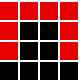

In [ ]:
cap = [[0.9,0.9,0.9,0.9],[0.9,0,0,0.9],[0.9,0,0,0.9],[0,0,0,0]]
L_shape = [[0.9,0,0,0],[0.9,0,0,0],[0.9,0,0,0],[0.9,0.9,0.9,0.9]]
square = [[0.9,0.9,0.9,0.9],[0.9,0,0,0.9],[0.9,0,0,0.9],[0.9,0.9,0.9,0.9]]

mat = np.random.randint(low = 0, high = 2, size = (4,4))
drawMatrix(cap).rasterize()

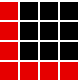

In [ ]:
drawMatrix(L_shape).rasterize()

# Network to detect the shapes : L-Shape, Square, Cap


In [ ]:
shape_net = Network([16,6,4],reg_constant=0.001)   # 16 is number of inputs, 4 is the number of outputs
#.....................with regularization.....................
flatten_cap = np.array(cap).reshape((16,1))
out = shape_net.feedforward(flatten_cap)
result = np.argmax(out)
print(out)

[[0.23789998]
 [0.6216285 ]
 [0.9436786 ]
 [0.10897289]]


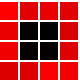

In [ ]:
# Create dataset for training
def getNoiseMatrix(mat):
    return np.array(mat) + np.random.normal(0, .05, np.array(mat).shape)
drawMatrix(getNoiseMatrix(square).tolist()).rasterize()

<class 'numpy.int64'>
<class 'numpy.ndarray'>
[[0]
 [1]
 [0]
 [0]]


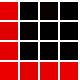

In [ ]:
training_shapes = []
training_shapes_labels = []  ## Label would be [Square, Cap, L, other] :: [1,0,0]
## Test label mapping:  Square = 0, Cap = 1, L = 2, other = 3

def createShapeData(size):
    """
    This function is used to create artificial data for training shape detector
    """
    shapes = []
    labels = []
    for i in range(size//4):
        noised_square = getNoiseMatrix(square).reshape((16,1))
        noised_cap = getNoiseMatrix(cap).reshape((16,1))
        noised_L = getNoiseMatrix(L_shape).reshape((16,1))
        other =  np.random.normal(.5, .5, (16,1))
        
        shapes.extend([noised_square, noised_cap, noised_L, other])
        labels.extend(map(convert_to_np_label, [[1,0,0,0], [0,1,0,0], [0,0,1,0], [0,0,0,1]]))
    return shapes, labels

def convert_to_np_label(lst):
    return np.array(lst).reshape(4,1)
        
training_shapes, training_labels = createShapeData(1000) 
test_shapes, test_labels = createShapeData(200) 
# need to convert test_labels to numbers
test_labels = [np.argmax(i) for i in test_labels]
# zip the data for Network
s_training_data = list(zip(training_shapes, training_labels))
s_test_data = list(zip(test_shapes, test_labels))
print(type(s_test_data[0][1]))
print(type(s_training_data[0][1]))

print(training_labels[1])
drawMatrix(training_shapes[2].reshape(4,4).tolist()).rasterize()

## Train the shape_net with the generated data

In [ ]:
shape_net.SGD(s_training_data, 10, 10, 0.1, s_test_data)
label_map = ["Square", "Cap", "L-Shape", "Other"]

# helper function to apply the model to get the shape name
def getShape(mat):
    out = shape_net.feedforward(mat.reshape(16,1))
    result = np.argmax(out)
    print(result)
    return label_map[result]
#print(shape_net.test_accuracy(s_training_data))
#shape_net.test_accuracy(s_test_data)

End of SGD


#Graph for Shapes

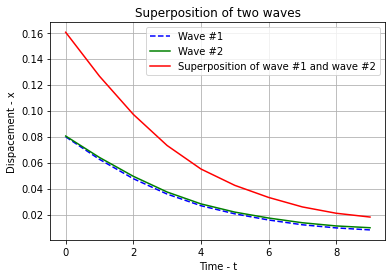

In [ ]:

n1 = 10
n2 = 20
amp = 4
#time = [i/1000.0 for i in range (0,1000)] # for one second
time = [i for i in range (10)] #number of epochs 
# let angular velocity be 1 radian per second
#wave1 = [amp*math.sin(n1*t)  for t in time]
wave1 = [error for error in shape_net.train_cost_history]
wave2 = [error for error in shape_net.test_cost_history]
####superposition of two waves is obtained by adding their values at each instance of time
superposition = [wave1[i] + wave2[i] for i in range(len(time))]
plt.plot(time, wave1, 'b--', label = "Wave #1")
plt.plot(time,wave2, 'g',  label = "Wave #2")
plt.plot(time, superposition, 'r-',  label = "Superposition of wave #1 and wave #2")
plt.legend()
plt.xlabel("Time - t")
plt.ylabel("Dispacement - x")
plt.title("Superposition of two waves")
plt.grid()
plt.show()

## Testing the model manually

In [ ]:
test_mat = np.array([
    0.9,0.88, 0.7,  0.9,
    0.9,0.22,0.1,  0.9,
    0.9,0.21,0.02, 0.9,
    0.9,0.8, 0.9,  0.9]
).reshape((4,4))

print("Predicted Shape is: ", getShape(test_mat))
drawMatrix(test_mat.tolist())

0
Predicted Shape is:  Square


In [ ]:
test_mat = np.array([
    0.9,0.2, 0.9,  0.0,
    0.9,0.22,0.1,  0.01,
    0.9,0.21,0.02, 0.02,
    0.9,0.8, 0.9,  0.01]
).reshape((4,4))

print("Predicted Shape is: ", getShape(test_mat))
drawMatrix(test_mat.tolist())

2
Predicted Shape is:  L-Shape


In [ ]:
#@title
# we can see the weights of the neurons using following
print(shape_net.weights[0])

[[-2.72424672e-01  4.31524094e-01 -1.49772049e+00 -3.94614399e-01
  -9.38064095e-01  2.35031915e+00  2.69261403e+00 -1.12909724e-01
  -1.45068171e+00  3.30509318e+00  1.24212168e+00 -8.14572174e-01
   6.05652744e-02  9.33536034e-01  9.26371194e-01 -5.94249662e-01]
 [ 3.72869065e-01 -1.72663769e+00 -8.00120576e-01  1.07296188e+00
  -1.97524370e-01 -9.43696593e-01  6.00824693e-02  2.84007255e-01
  -1.15172691e+00  2.02672207e-01 -2.02858319e+00  9.86041418e-01
  -9.54650206e-01  2.78456948e-03 -4.18898488e-02 -1.70902579e-01]
 [ 1.47934835e+00  3.76217314e-01  9.30200104e-01  1.36318408e+00
   6.99349876e-02 -8.45131486e-02  6.92128094e-01  2.31153864e+00
   6.75627821e-01 -4.59173116e-01 -3.30955205e-01  2.47776535e-01
   1.91152202e+00 -1.99311571e-01  5.25756545e-03  6.28155556e-01]
 [-1.56696432e+00  1.57454110e+00  1.47463711e+00  7.66187193e-01
  -1.40059321e+00  1.59742541e+00  1.10152244e+00  1.20220895e+00
  -9.44896981e-01  9.51439778e-01  2.02498247e+00  1.75868768e-01
   1.33